<a href="https://colab.research.google.com/github/MarcosCarreira/UZStats/blob/master/CME_Tick_Changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Robert and Rosenbaum Uncertainty Zones model

# An application to FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Jul-2019

## Import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
pd.set_option('display.max_columns', 50)

In [0]:
pd.set_option('display.max_rows', 200)

In [0]:
#import glob

## File paths

In [0]:
URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [0]:
URL_EUR_1 = 'EUR/prior/'

In [0]:
URL_1 = URL_ROOT+URL_EUR_1+'6EU5_20150821_CAticks.csv'
URL_2 = URL_ROOT+URL_EUR_1+'6EU5_20150821_COSTtrades.csv'
URL_3 = URL_ROOT+URL_EUR_1+'6EU5_20150821_OBstats.csv'
URL_4 = URL_ROOT+URL_EUR_1+'6EU5_20150821_OTtrans.csv'
URL_5 = URL_ROOT+URL_EUR_1+'6EU5_20150821_RDFtrans.csv'
URL_6 = URL_ROOT+URL_EUR_1+'6EU5_20150821_UZstats.csv'

In [0]:
CAticks = pd.read_csv(URL_1)

In [31]:
CAticks

,Unnamed: 0,Li,lamb,Co,Al,u,eta
0,0,1.0,0.987338,2111.0,4048.0,0.260746,0.257444
1,1,2.0,0.011540,9.0,63.0,-0.357143,-0.004122
2,2,3.0,0.000962,4.0,2.0,2.000000,0.001923
3,3,4.0,0.000160,0.0,1.0,-1.500000,-0.000240


In [0]:
COSTtrades = pd.read_csv(URL_2)

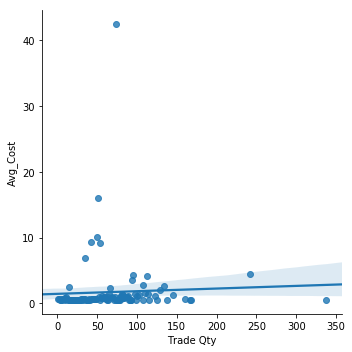

In [33]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=COSTtrades)

In [34]:
pd.read_csv(URL_3)

,Unnamed: 0,ask12qty,ask12tomid,ask1qty,ask1tomid,bid12qty,bid12tomid,bid1qty,bid1tomid,twspr1,twspr2
0,6EU5_20150821,149.362767,1.312322,40.368828,0.554642,155.714918,1.307632,42.483564,0.554642,1.109284,3.109814


In [35]:
pd.read_csv(URL_4)

,t,-2.0,-1.0,0.0,1.0,2.0
0,-2.0,24021,15710,3112,1231,5
1,-1.0,9266,298816,16179,897,3283
2,0.0,7413,11809,344035,12417,7614
3,1.0,3372,893,17049,318708,8827
4,2.0,7,1214,2912,15596,25669


In [36]:
pd.read_csv(URL_5)

,side,same,same.1,same.2,same.3,opps,opps.1,opps.2,opps.3
0,event,DC,DT,DT+F,F,DC,DT,DT+F,F
1,DC,7,5,30,13461,1,1,954,231
2,DT,3,28,325,7881,2,7,1522,1837
3,DT+F,7,4,92,2404,1,3,458,414
4,F,8997,3651,2,23,5671,7907,0,20


In [37]:
pd.read_csv(URL_6)

,Unnamed: 0,chgavg,dt_alt,dt_avg,dt_cont,duration,eta1,ndfpr,rvp,rvxe,spot_avg
0,6EU5_20150821,1.013945,4.090686,4.616037,5.631621,4.971592,0.257444,6239.0,0.007119,0.005108,11339.934776


In [0]:
PATH_EUR_BEFORE = PATHPROJ+'EUR/prior/'
PATH_EUR_AFTER = PATHPROJ+'EUR/after/'

In [0]:
PATH_MXN_BEFORE = PATHPROJ+'MXN/prior/'
PATH_MXN_AFTER = PATHPROJ+'MXN/after/'

In [0]:
FILES_EUR_BEFORE_CAticks = [f for f in glob.glob(PATH_EUR_BEFORE + '*_CAticks.h5',\
                                    recursive=True)]
FILES_EUR_BEFORE_CAticks.sort()
FILES_EUR_BEFORE_COSTtrades = [f for f in glob.glob(PATH_EUR_BEFORE + '*_COSTtrades.h5',\
                                    recursive=True)]
FILES_EUR_BEFORE_COSTtrades.sort()
FILES_EUR_BEFORE_OBstats = [f for f in glob.glob(PATH_EUR_BEFORE + '*_OBstats.h5',\
                                    recursive=True)]
FILES_EUR_BEFORE_OBstats.sort()
FILES_EUR_BEFORE_OTtrans = [f for f in glob.glob(PATH_EUR_BEFORE + '*_OTtrans.h5',\
                                    recursive=True)]
FILES_EUR_BEFORE_OTtrans.sort()
FILES_EUR_BEFORE_RDFtrans = [f for f in glob.glob(PATH_EUR_BEFORE + '*_RDFtrans.h5',\
                                    recursive=True)]
FILES_EUR_BEFORE_RDFtrans.sort()
FILES_EUR_BEFORE_UZstats = [f for f in glob.glob(PATH_EUR_BEFORE + '*_UZstats.h5',\
                                    recursive=True)]
FILES_EUR_BEFORE_UZstats.sort()

In [0]:
[len(FILES_EUR_BEFORE_CAticks), len(FILES_EUR_BEFORE_COSTtrades), len(FILES_EUR_BEFORE_OBstats),\
    len(FILES_EUR_BEFORE_OTtrans), len(FILES_EUR_BEFORE_RDFtrans), len(FILES_EUR_BEFORE_UZstats)]

[142, 142, 142, 142, 142, 142]

In [0]:
DATES_BEFORE_EUR = pd.to_datetime([f[-19:-11] for f in FILES_EUR_BEFORE_CAticks], format='%Y%m%d')

In [0]:
TICK_BEFORE_EUR = len(FILES_EUR_BEFORE_CAticks)*['prior']

In [0]:
TICK_VALUE_BEFORE_EUR = len(FILES_EUR_BEFORE_CAticks)*[1.0]

In [0]:
FILES_EUR_AFTER_CAticks = [f for f in glob.glob(PATH_EUR_AFTER + '*_CAticks.h5',\
                                    recursive=True)]
FILES_EUR_AFTER_CAticks.sort()
FILES_EUR_AFTER_COSTtrades = [f for f in glob.glob(PATH_EUR_AFTER + '*_COSTtrades.h5',\
                                    recursive=True)]
FILES_EUR_AFTER_COSTtrades.sort()
FILES_EUR_AFTER_OBstats = [f for f in glob.glob(PATH_EUR_AFTER + '*_OBstats.h5',\
                                    recursive=True)]
FILES_EUR_AFTER_OBstats.sort()
FILES_EUR_AFTER_OTtrans = [f for f in glob.glob(PATH_EUR_AFTER + '*_OTtrans.h5',\
                                    recursive=True)]
FILES_EUR_AFTER_OTtrans.sort()
FILES_EUR_AFTER_RDFtrans = [f for f in glob.glob(PATH_EUR_AFTER + '*_RDFtrans.h5',\
                                    recursive=True)]
FILES_EUR_AFTER_RDFtrans.sort()
FILES_EUR_AFTER_UZstats = [f for f in glob.glob(PATH_EUR_AFTER + '*_UZstats.h5',\
                                    recursive=True)]
FILES_EUR_AFTER_UZstats.sort()

In [0]:
[len(FILES_EUR_AFTER_CAticks), len(FILES_EUR_AFTER_COSTtrades), len(FILES_EUR_AFTER_OBstats),\
    len(FILES_EUR_AFTER_OTtrans), len(FILES_EUR_AFTER_RDFtrans), len(FILES_EUR_AFTER_UZstats)]

[43, 43, 43, 43, 43, 43]

In [0]:
DATES_AFTER_EUR = pd.to_datetime([f[-19:-11] for f in FILES_EUR_AFTER_CAticks], format='%Y%m%d')

In [0]:
TICK_AFTER_EUR = len(FILES_EUR_AFTER_CAticks)*['after']

In [0]:
TICK_VALUE_AFTER_EUR = len(FILES_EUR_AFTER_CAticks)*[0.5]

In [0]:
DATES_EUR = list(DATES_BEFORE_EUR)+list(DATES_AFTER_EUR)

In [0]:
TICKS_EUR = TICK_BEFORE_EUR+TICK_AFTER_EUR

In [0]:
TICK_VALUES_EUR = TICK_VALUE_BEFORE_EUR+TICK_VALUE_AFTER_EUR

In [0]:
[len(DATES_EUR), len(TICKS_EUR), len(TICK_VALUES_EUR)]

[185, 185, 185]

In [0]:
FILES_MXN_BEFORE_CAticks = [f for f in glob.glob(PATH_MXN_BEFORE + '*_CAticks.h5',\
                                    recursive=True)]
FILES_MXN_BEFORE_CAticks.sort()
FILES_MXN_BEFORE_COSTtrades = [f for f in glob.glob(PATH_MXN_BEFORE + '*_COSTtrades.h5',\
                                    recursive=True)]
FILES_MXN_BEFORE_COSTtrades.sort()
FILES_MXN_BEFORE_OBstats = [f for f in glob.glob(PATH_MXN_BEFORE + '*_OBstats.h5',\
                                    recursive=True)]
FILES_MXN_BEFORE_OBstats.sort()
FILES_MXN_BEFORE_OTtrans = [f for f in glob.glob(PATH_MXN_BEFORE + '*_OTtrans.h5',\
                                    recursive=True)]
FILES_MXN_BEFORE_OTtrans.sort()
FILES_MXN_BEFORE_RDFtrans = [f for f in glob.glob(PATH_MXN_BEFORE + '*_RDFtrans.h5',\
                                    recursive=True)]
FILES_MXN_BEFORE_RDFtrans.sort()
FILES_MXN_BEFORE_UZstats = [f for f in glob.glob(PATH_MXN_BEFORE + '*_UZstats.h5',\
                                    recursive=True)]
FILES_MXN_BEFORE_UZstats.sort()

In [0]:
[len(FILES_MXN_BEFORE_CAticks), len(FILES_MXN_BEFORE_COSTtrades), len(FILES_MXN_BEFORE_OBstats),\
    len(FILES_MXN_BEFORE_OTtrans), len(FILES_MXN_BEFORE_RDFtrans), len(FILES_MXN_BEFORE_UZstats)]

[85, 85, 85, 85, 85, 85]

In [0]:
DATES_BEFORE_MXN = pd.to_datetime([f[-19:-11] for f in FILES_MXN_BEFORE_CAticks], format='%Y%m%d')

In [0]:
TICK_BEFORE_MXN = len(FILES_MXN_BEFORE_CAticks)*['prior']

In [0]:
TICK_VALUE_BEFORE_MXN = len(FILES_MXN_BEFORE_CAticks)*[25.0]

In [0]:
FILES_MXN_AFTER_CAticks = [f for f in glob.glob(PATH_MXN_AFTER + '*_CAticks.h5',\
                                    recursive=True)]
FILES_MXN_AFTER_CAticks.sort()
FILES_MXN_AFTER_COSTtrades = [f for f in glob.glob(PATH_MXN_AFTER + '*_COSTtrades.h5',\
                                    recursive=True)]
FILES_MXN_AFTER_COSTtrades.sort()
FILES_MXN_AFTER_OBstats = [f for f in glob.glob(PATH_MXN_AFTER + '*_OBstats.h5',\
                                    recursive=True)]
FILES_MXN_AFTER_OBstats.sort()
FILES_MXN_AFTER_OTtrans = [f for f in glob.glob(PATH_MXN_AFTER + '*_OTtrans.h5',\
                                    recursive=True)]
FILES_MXN_AFTER_OTtrans.sort()
FILES_MXN_AFTER_RDFtrans = [f for f in glob.glob(PATH_MXN_AFTER + '*_RDFtrans.h5',\
                                    recursive=True)]
FILES_MXN_AFTER_RDFtrans.sort()
FILES_MXN_AFTER_UZstats = [f for f in glob.glob(PATH_MXN_AFTER + '*_UZstats.h5',\
                                    recursive=True)]
FILES_MXN_AFTER_UZstats.sort()

In [0]:
[len(FILES_MXN_AFTER_CAticks), len(FILES_MXN_AFTER_COSTtrades), len(FILES_MXN_AFTER_OBstats),\
    len(FILES_MXN_AFTER_OTtrans), len(FILES_MXN_AFTER_RDFtrans), len(FILES_MXN_AFTER_UZstats)]

[85, 85, 85, 85, 85, 85]

In [0]:
DATES_AFTER_MXN = pd.to_datetime([f[-19:-11] for f in FILES_MXN_AFTER_CAticks], format='%Y%m%d')

In [0]:
TICK_AFTER_MXN = len(FILES_MXN_AFTER_CAticks)*['after']

In [0]:
TICK_VALUE_AFTER_MXN = len(FILES_MXN_AFTER_CAticks)*[10.0]

In [0]:
DATES_MXN = list(DATES_BEFORE_MXN)+list(DATES_AFTER_MXN)

In [0]:
TICKS_MXN = TICK_BEFORE_MXN+TICK_AFTER_MXN

In [0]:
TICK_VALUES_MXN = TICK_VALUE_BEFORE_MXN+TICK_VALUE_AFTER_MXN

In [0]:
[len(DATES_MXN), len(TICKS_MXN), len(TICK_VALUES_MXN)]

[170, 170, 170]

## Keys

In [0]:
# KEYS = [
#     '/df_cont_alt_by_ticks',
#     '/df_ot_trans',
#     '/df_red_deplfill_trans',
#     '/df_time_weighted_tob',
#     '/df_uz_stats',
#     '/df_cost_of_trades']

In [0]:
# DF_STATS = pd.DataFrame()
# for j in range(len(FILES_BEFORE)):
#     new_row_1 = pd.read_hdf(FILES_BEFORE[j], key='/df_time_weighted_tob')
#     new_row_2 = pd.read_hdf(FILES_BEFORE[j], key='/df_uz_stats')
#     new_row = pd.concat([new_row_1, new_row_2], axis=1)
#     DF_STATS = DF_STATS.append(new_row)
# for j in range(len(FILES_AFTER)):
#     new_row_1 = pd.read_hdf(FILES_AFTER[j], key='/df_time_weighted_tob')
#     new_row_2 = pd.read_hdf(FILES_AFTER[j], key='/df_uz_stats')
#     new_row = pd.concat([new_row_1, new_row_2], axis=1)
#     DF_STATS = DF_STATS.append(new_row)
# DF_STATS.reset_index()
# DF_STATS.index = DATES_BEFORE+DATES_AFTER
# DF_STATS.sort_index(inplace=True)
# #DF_STATS['dt_alt'] = DF_STATS['dt_alt'].dt.total_seconds()
# #DF_STATS['dt_avg'] = DF_STATS['dt_avg'].dt.total_seconds()
# #DF_STATS['dt_cont'] = DF_STATS['dt_cont'].dt.total_seconds()

In [0]:
# DF_STATS = pd.DataFrame()
# for j in range(len(FILES_AFTER_UZ)):
#     new_row_1 = pd.read_hdf(FILES_AFTER_OB[j])
#     new_row_2 = pd.read_hdf(FILES_AFTER_UZ[j])
#     new_row = pd.concat([new_row_1, new_row_2], axis=1)
#     DF_STATS = DF_STATS.append(new_row)
# DF_STATS.reset_index()
# DF_STATS.index = DATES_AFTER
# #DF_STATS.sort_index(inplace=True)

In [0]:
DF_STATS_EUR = pd.DataFrame()
for j in range(len(DATES_BEFORE_EUR)):
    new_row_1 = pd.read_hdf(FILES_EUR_BEFORE_OBstats[j])
    new_row_2 = pd.read_hdf(FILES_EUR_BEFORE_UZstats[j])
    new_row = pd.concat([new_row_1, new_row_2], axis=1, sort=False)
    DF_STATS_EUR = DF_STATS_EUR.append(new_row)
for j in range(len(DATES_AFTER_EUR)):
    new_row_1 = pd.read_hdf(FILES_EUR_AFTER_OBstats[j])
    new_row_2 = pd.read_hdf(FILES_EUR_AFTER_UZstats[j])
    new_row = pd.concat([new_row_1, new_row_2], axis=1, sort=False)
    DF_STATS_EUR = DF_STATS_EUR.append(new_row)
DF_STATS_EUR['Dates'] = DATES_EUR
DF_STATS_EUR['Tick'] = TICKS_EUR
DF_STATS_EUR['Tick Value'] = TICK_VALUES_EUR
DF_STATS_EUR.set_index(['Dates'], inplace=True)
DF_STATS_EUR.sort_index(inplace=True)

In [0]:
DF_STATS_MXN = pd.DataFrame()
for j in range(len(DATES_BEFORE_MXN)):
    new_row_1 = pd.read_hdf(FILES_MXN_BEFORE_OBstats[j])
    new_row_2 = pd.read_hdf(FILES_MXN_BEFORE_UZstats[j])
    new_row = pd.concat([new_row_1, new_row_2], axis=1, sort=False)
    DF_STATS_MXN = DF_STATS_MXN.append(new_row)
for j in range(len(DATES_AFTER_MXN)):
    new_row_1 = pd.read_hdf(FILES_MXN_AFTER_OBstats[j])
    new_row_2 = pd.read_hdf(FILES_MXN_AFTER_UZstats[j])
    new_row = pd.concat([new_row_1, new_row_2], axis=1, sort=False)
    DF_STATS_MXN = DF_STATS_MXN.append(new_row)
DF_STATS_MXN['Dates'] = DATES_MXN
DF_STATS_MXN['Tick'] = TICKS_MXN
DF_STATS_MXN['Tick Value'] = TICK_VALUES_MXN
DF_STATS_MXN.set_index(['Dates'], inplace=True)
DF_STATS_MXN.sort_index(inplace=True)

In [0]:
len(DF_STATS_MXN)

170

In [0]:
DF_STATS_EUR_NI = DF_STATS_EUR.reset_index()

In [0]:
DF_STATS_MXN_NI = DF_STATS_MXN.reset_index()

In [0]:
DF_STATS_EUR[DF_STATS_EUR['rvxe']>0.02]

,ask12qty,ask12tomid,ask1qty,ask1tomid,bid12qty,bid12tomid,bid1qty,bid1tomid,twspr1,twspr2,chgavg,dt_alt,dt_avg,dt_cont,duration,eta1,ndfpr,rvp,rvxe,spot_avg,Tick,Tick Value
Dates,,,,,,,,,,,,,,,,,,,,,,
2015-06-18,82.989397,1.350425,20.797045,0.630599,90.809792,1.347677,24.467065,0.630599,1.261199,3.347028,1.204603,3.895878,4.304059,5.024189,0.347105,0.286097,6691.0,0.026795,0.020268,11402.374029,prior,1.0
2015-06-23,105.731676,1.463397,27.244374,0.704822,100.777961,1.470376,25.202883,0.704822,1.409643,3.409677,1.414982,4.775453,5.545162,7.095087,0.092165,0.249653,5193.0,0.053033,0.037474,11180.119561,prior,1.0
2015-06-29,70.378575,1.617141,17.743672,0.875209,68.043707,1.614775,17.140364,0.875209,1.750419,3.750925,1.151685,2.943750,3.234402,3.705728,0.311583,0.310484,8900.0,0.028775,0.022675,11206.497809,prior,1.0
2015-06-30,90.146930,1.334312,23.216049,0.573151,93.033428,1.318632,25.938485,0.573151,1.146302,3.147349,1.338962,3.519219,3.985873,4.913033,0.146529,0.252468,7225.0,0.042063,0.029890,11179.132992,prior,1.0
2015-07-08,83.975572,1.518562,21.125514,0.751065,85.989335,1.520790,21.553227,0.751065,1.502130,3.502180,1.209640,5.159203,5.507958,6.021613,0.323321,0.341515,5228.0,0.028595,0.023632,11070.504112,prior,1.0
2015-07-10,95.899602,1.308525,25.225191,0.554296,97.815560,1.318427,24.686287,0.554296,1.108592,3.112173,1.249868,4.550381,5.049939,5.920765,0.178498,0.287727,5703.0,0.038152,0.028942,11166.928296,prior,1.0
2015-07-13,96.910070,1.532010,25.345100,0.798249,93.289889,1.540793,24.049495,0.798249,1.596497,3.596576,1.264928,6.509940,7.018612,7.843778,0.276397,0.309928,4103.0,0.031032,0.024432,11033.082602,prior,1.0
2015-07-21,158.638887,1.324158,43.380265,0.569435,163.766220,1.326186,44.156328,0.569435,1.138870,3.138985,1.244622,4.755378,5.340254,6.687820,0.223818,0.217784,5392.0,0.034810,0.022974,10929.901910,prior,1.0
2015-07-30,158.848379,1.376012,43.878225,0.662962,152.581849,1.419238,40.417593,0.662962,1.325925,3.325925,1.490419,6.724251,7.456264,9.049734,0.177679,0.228758,3862.0,0.039081,0.026435,10926.569247,prior,1.0


In [0]:
DF_STATS_MXN[DF_STATS_MXN['rvxe']>0.02]

,ask12qty,ask12tomid,ask1qty,ask1tomid,bid12qty,bid12tomid,bid1qty,bid1tomid,twspr1,twspr2,chgavg,dt_alt,dt_avg,dt_cont,duration,eta1,ndfpr,rvp,rvxe,spot_avg,Tick,Tick Value
Dates,,,,,,,,,,,,,,,,,,,,,,
2014-06-09,402.354764,1.527645,131.095925,0.841839,407.964167,1.772943,137.465243,0.841839,1.683679,3.944504,76.939655,65.748466,82.755618,125.644786,2.123019,0.178776,348.0,0.040147,0.024006,76928.366762,prior,25.0
2014-09-05,240.045129,1.330029,63.503081,0.550977,196.575020,1.335276,48.468827,0.550977,1.101953,3.101963,37.568807,30.298146,33.024281,37.405626,0.230793,0.308750,872.0,0.048989,0.038496,76482.302405,after,10.0
2014-09-08,173.549400,3.015958,41.615116,2.127487,200.115470,2.876192,52.641031,2.127487,4.254975,6.789321,36.875872,36.147614,40.031623,47.651516,0.453598,0.248842,717.0,0.035041,0.024720,76272.075209,after,10.0
2014-09-09,188.898825,2.557132,45.409600,1.750081,205.499848,2.588463,56.246804,1.750081,3.500162,6.496756,38.310547,26.658073,27.955317,30.006050,0.247823,0.318733,1024.0,0.047806,0.038169,75634.360976,after,10.0
2014-09-12,228.580007,1.563097,79.250825,0.857285,198.190783,1.623705,55.085828,0.857285,1.714570,3.715648,86.506276,54.360760,58.959816,68.096354,0.387810,0.263319,478.0,0.038306,0.027799,75456.680585,after,10.0


## Dataframe of price changes by k

In [0]:
DF_STATS_EUR_MOVES = pd.DataFrame()
for j in range(len(FILES_EUR_BEFORE_CAticks)):
    new_row = pd.read_hdf(FILES_EUR_BEFORE_CAticks[j])
    new_row['Dates'] = DATES_BEFORE_EUR[j].strftime('%Y-%m-%d')
    new_row['Tick'] = TICK_BEFORE_EUR[j]
    new_row['Tick Value'] = TICK_VALUE_BEFORE_EUR[j]
    DF_STATS_EUR_MOVES = DF_STATS_EUR_MOVES.append(new_row)
for j in range(len(FILES_EUR_AFTER_CAticks)):
    new_row = pd.read_hdf(FILES_EUR_AFTER_CAticks[j])
    new_row['Dates'] = DATES_AFTER_EUR[j].strftime('%Y-%m-%d')
    new_row['Tick'] = TICK_AFTER_EUR[j]
    new_row['Tick Value'] = TICK_VALUE_AFTER_EUR[j]
    DF_STATS_EUR_MOVES = DF_STATS_EUR_MOVES.append(new_row)
DF_STATS_EUR_MOVES.reset_index()
DF_STATS_EUR_MOVES.set_index(['Dates', 'Tick'], inplace=True)
DF_STATS_EUR_MOVES.sort_index(inplace=True)

In [0]:
DF_STATS_MXN_MOVES = pd.DataFrame()
for j in range(len(FILES_MXN_BEFORE_CAticks)):
    new_row = pd.read_hdf(FILES_MXN_BEFORE_CAticks[j])
    new_row['Dates'] = DATES_BEFORE_MXN[j].strftime('%Y-%m-%d')
    new_row['Tick'] = TICK_BEFORE_MXN[j]
    new_row['Tick Value'] = TICK_VALUE_BEFORE_MXN[j]
    DF_STATS_MXN_MOVES = DF_STATS_MXN_MOVES.append(new_row)
for j in range(len(FILES_MXN_AFTER_CAticks)):
    new_row = pd.read_hdf(FILES_MXN_AFTER_CAticks[j])
    new_row['Dates'] = DATES_AFTER_MXN[j].strftime('%Y-%m-%d')
    new_row['Tick'] = TICK_AFTER_MXN[j]
    new_row['Tick Value'] = TICK_VALUE_AFTER_MXN[j]
    DF_STATS_MXN_MOVES = DF_STATS_MXN_MOVES.append(new_row)
DF_STATS_MXN_MOVES.reset_index()
DF_STATS_MXN_MOVES.set_index(['Dates', 'Tick'], inplace=True)
DF_STATS_MXN_MOVES.sort_index(inplace=True)

In [0]:
def get_moves_mat(data_frame, date):
    mat_values = data_frame.copy().loc[date].values
    mat_df = pd.DataFrame(mat_values,\
        columns=['Move in ticks', 'lambda',\
            'Continuations', 'Alternations', 'u', 'eta',\
            'Tick Value'])
    return mat_df

In [0]:
def get_lambda1_mat():
    sub_mat = DF_STATS_MOVES.copy().reset_index()
    sub_mat = sub_mat[sub_mat['Li']==1]\
        [['Product', 'Contract', 'Dates', 'lamb']]
    return sub_mat

In [0]:
SIZES_MOVES_EUR = pd.DataFrame([[date, len(get_moves_mat(DF_STATS_EUR_MOVES,\
    date.strftime('%Y-%m-%d'))), max(get_moves_mat(DF_STATS_EUR_MOVES,\
    date.strftime('%Y-%m-%d'))['Move in ticks'])] for date in DATES_EUR],\
    columns=['Dates', 'Sizes', 'Max move'])
SIZES_MOVES_EUR.set_index(['Dates'], inplace=True)

In [0]:
SIZES_MOVES_MXN = pd.DataFrame([[date, len(get_moves_mat(DF_STATS_MXN_MOVES,\
    date.strftime('%Y-%m-%d'))), max(get_moves_mat(DF_STATS_MXN_MOVES,\
    date.strftime('%Y-%m-%d'))['Move in ticks'])] for date in DATES_MXN],\
    columns=['Dates', 'Sizes', 'Max move'])
SIZES_MOVES_MXN.set_index(['Dates'], inplace=True)

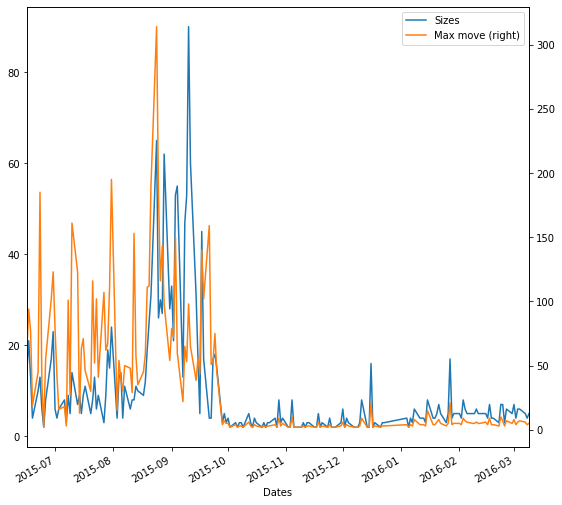

In [0]:
SIZES_MOVES_EUR.plot(secondary_y='Max move', figsize=(9,9));

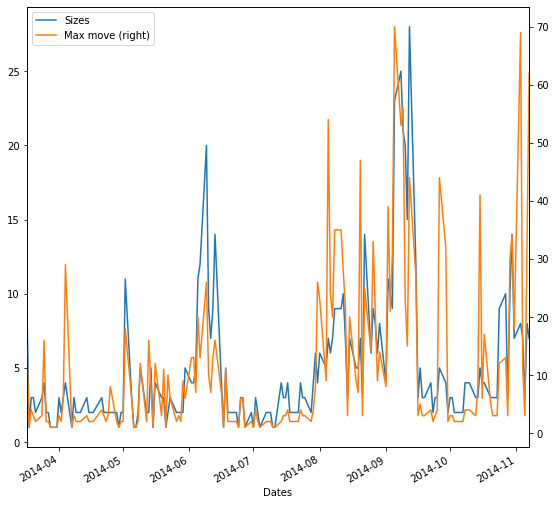

In [0]:
SIZES_MOVES_MXN.plot(secondary_y='Max move', figsize=(9,9));

In [0]:
DF_STATS_EUR_2 = DF_STATS_EUR.copy().loc['2015-10-01':]
DF_STATS_EUR_NI_2 = DF_STATS_EUR_2.reset_index()

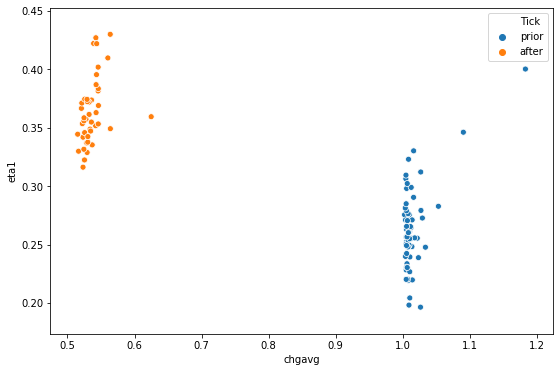

In [0]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='chgavg', y='eta1', hue='Tick',\
            data=DF_STATS_EUR_2);

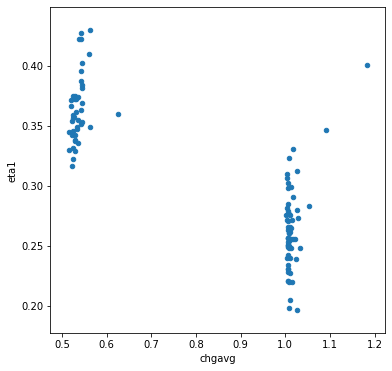

In [0]:
DF_STATS_EUR_2.plot.scatter(x='chgavg', y='eta1', figsize=(6,6));

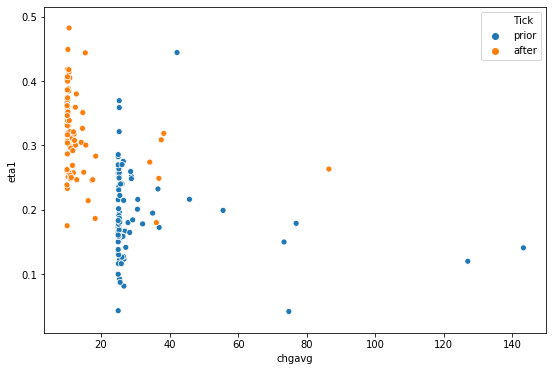

In [0]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='chgavg', y='eta1', hue='Tick',\
            data=DF_STATS_MXN);

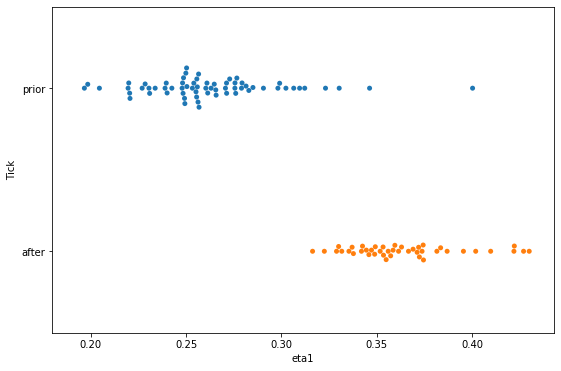

In [0]:
plt.figure(figsize=(9,6))
sns.swarmplot(x='eta1', y='Tick',\
            data=DF_STATS_EUR_2);

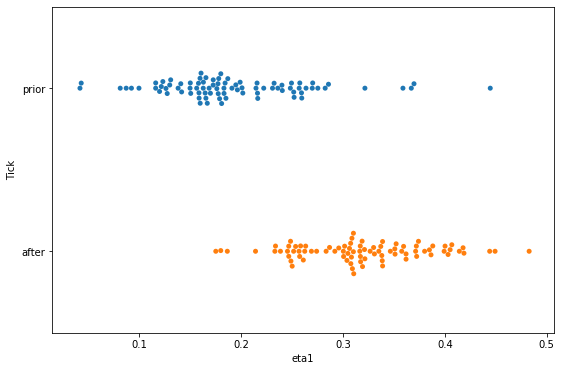

In [0]:
plt.figure(figsize=(9,6))
sns.swarmplot(x='eta1', y='Tick',\
            data=DF_STATS_MXN);

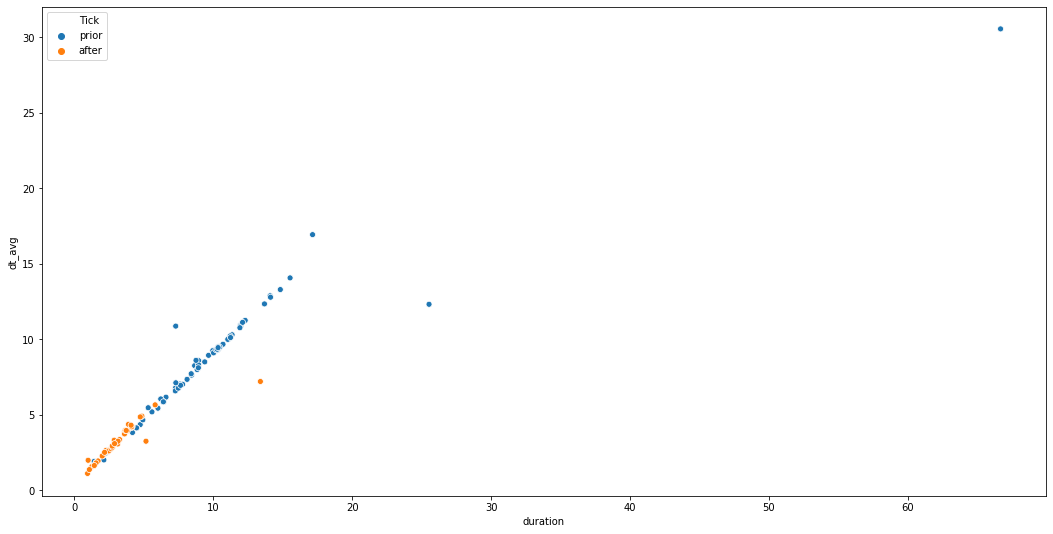

In [0]:
plt.figure(figsize=(18,9))
sns.scatterplot(x='duration', y='dt_avg', hue='Tick',\
            data=DF_STATS_EUR_2);

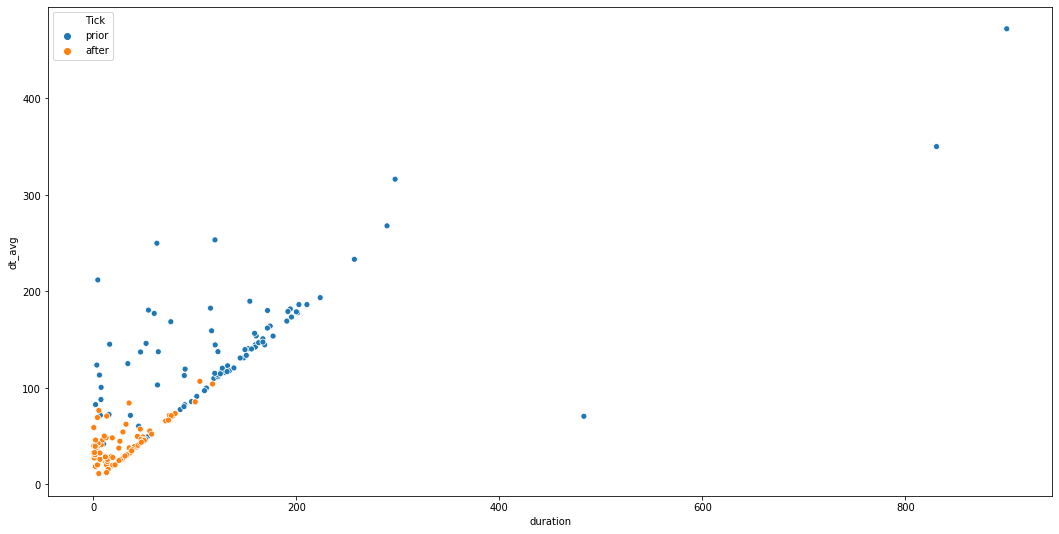

In [0]:
plt.figure(figsize=(18,9))
sns.scatterplot(x='duration', y='dt_avg', hue='Tick',\
            data=DF_STATS_MXN);

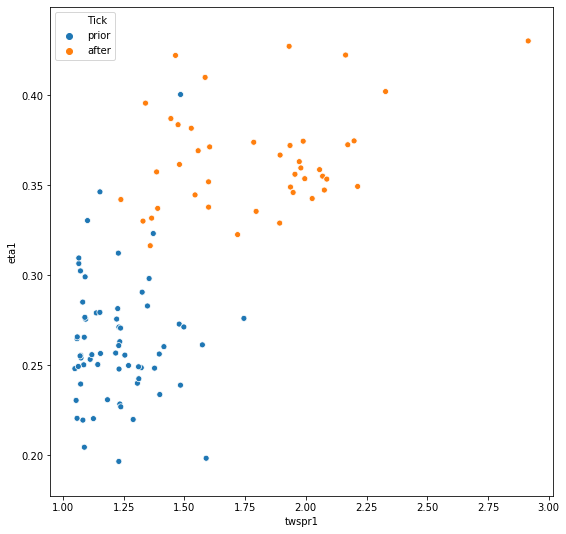

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='twspr1', y='eta1', hue='Tick',\
            data=DF_STATS_EUR_2);

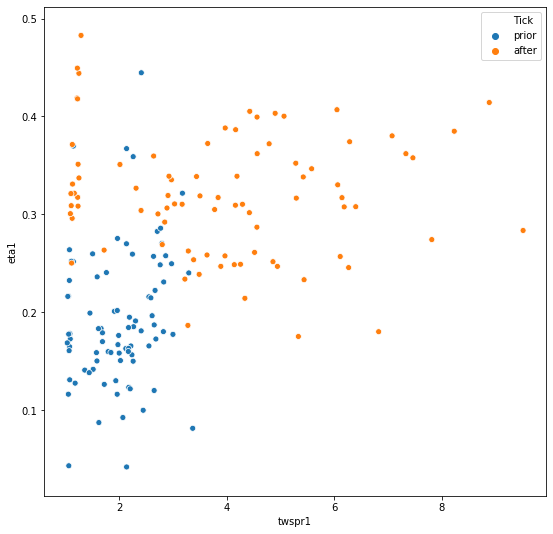

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='twspr1', y='eta1', hue='Tick',\
            data=DF_STATS_MXN);

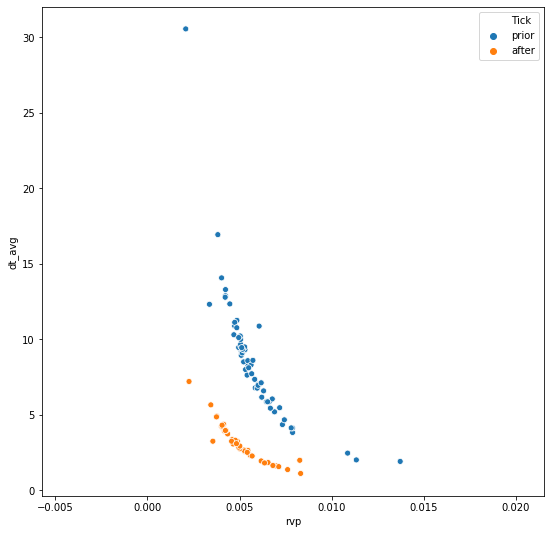

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='rvp', y='dt_avg', hue='Tick',\
            data=DF_STATS_EUR_2);

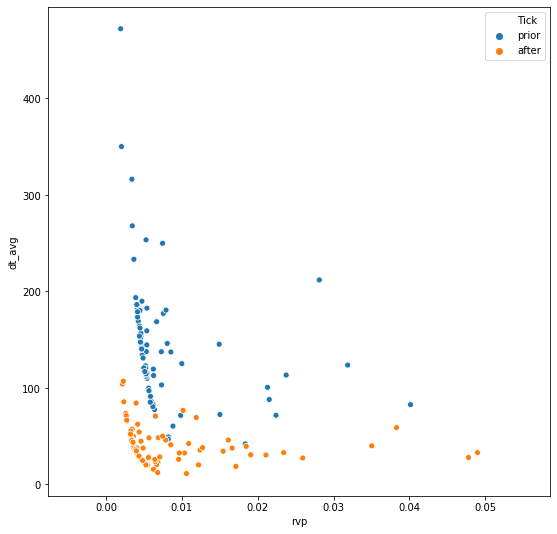

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='rvp', y='dt_avg', hue='Tick',\
            data=DF_STATS_MXN);

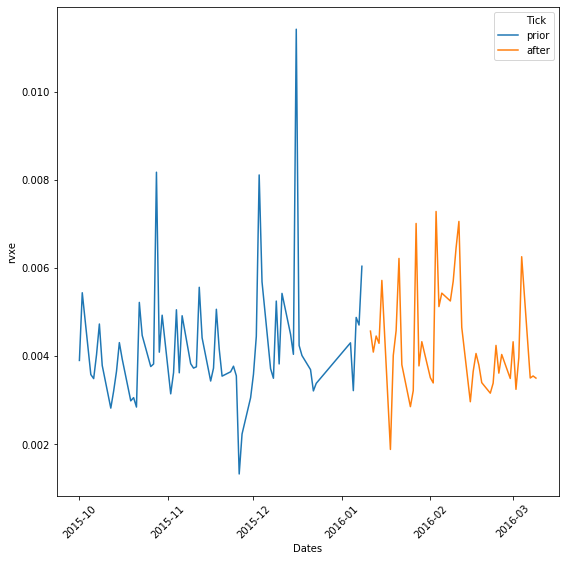

In [0]:
plt.figure(figsize=(9,9))
sns.lineplot(x='Dates', y='rvxe', hue='Tick', data=DF_STATS_EUR_NI_2);
plt.xticks(rotation=45);

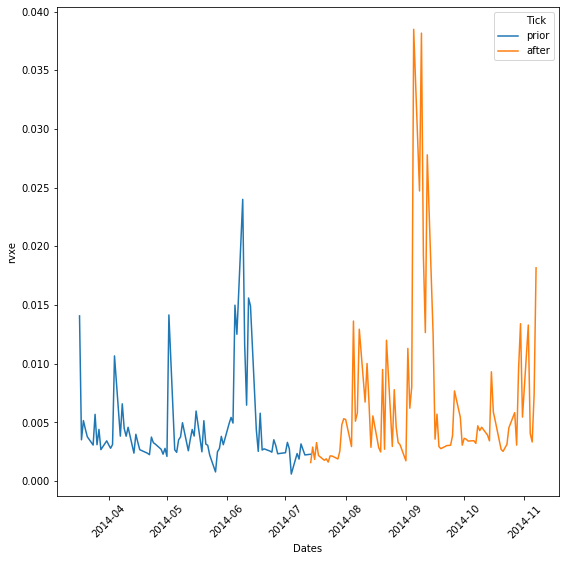

In [0]:
plt.figure(figsize=(9,9))
sns.lineplot(x='Dates', y='rvxe', hue='Tick', data=DF_STATS_MXN_NI);
plt.xticks(rotation=45);

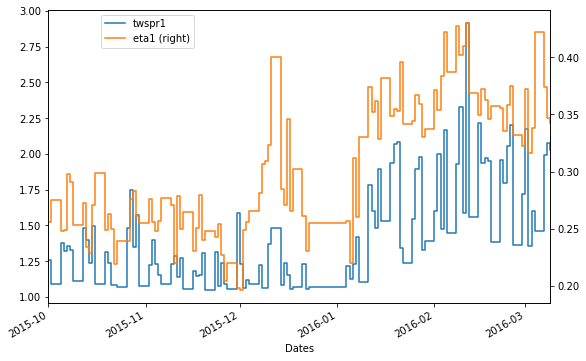

In [0]:
ax = DF_STATS_EUR_2[['twspr1','eta1']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['eta1']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

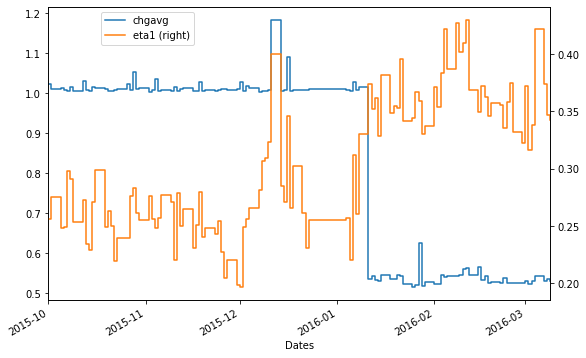

In [0]:
ax = DF_STATS_EUR_2[['chgavg','eta1']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['eta1']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

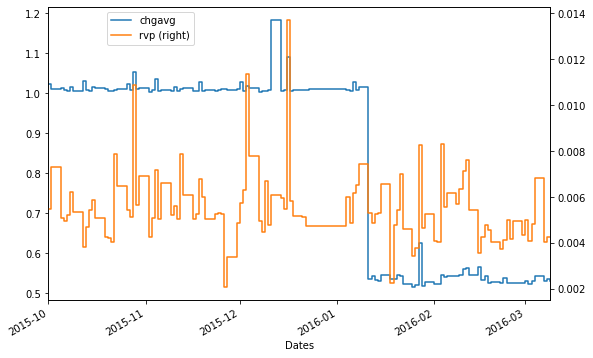

In [0]:
ax = DF_STATS_EUR_2[['chgavg','rvp']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['rvp']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

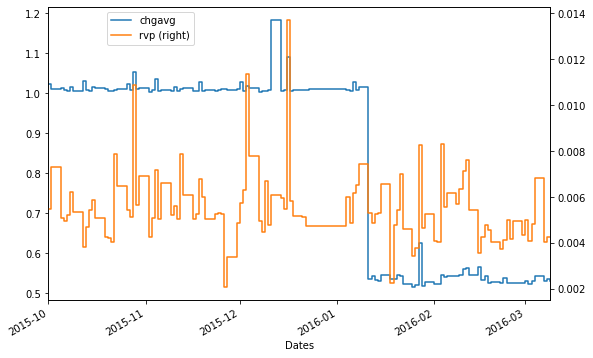

In [0]:
ax = DF_STATS_EUR_2[['chgavg','rvp']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['rvp']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

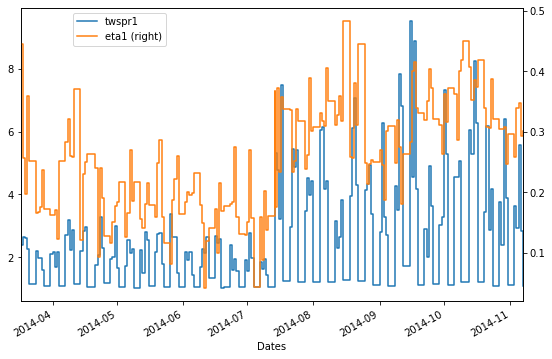

In [0]:
ax = DF_STATS_MXN[['twspr1','eta1']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['eta1']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

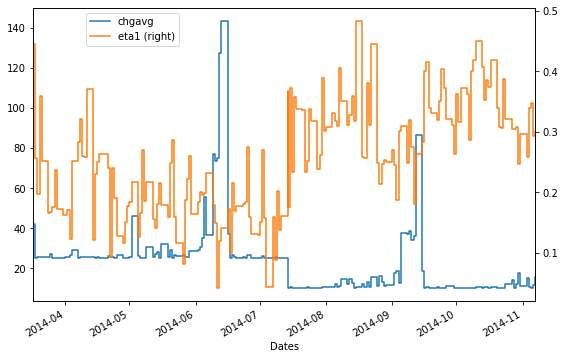

In [0]:
ax = DF_STATS_MXN[['chgavg','eta1']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['eta1']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

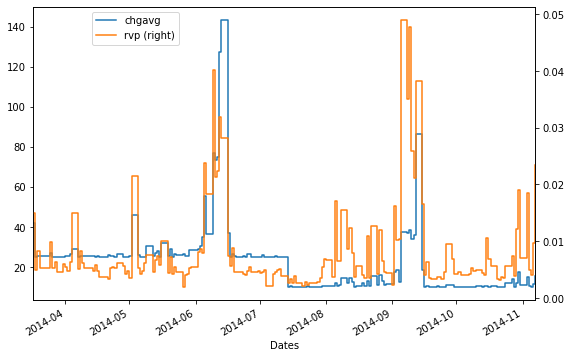

In [0]:
ax = DF_STATS_MXN[['chgavg','rvp']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['rvp']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

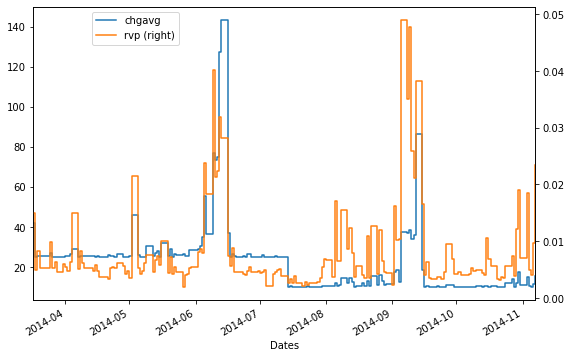

In [0]:
ax = DF_STATS_MXN[['chgavg','rvp']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['rvp']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

In [0]:
DF_STATS_EUR_COST = pd.DataFrame()
for j in range(len(FILES_EUR_BEFORE_COSTtrades)):
    new_row = pd.read_hdf(FILES_EUR_BEFORE_COSTtrades[j])
    new_row['Date'] = DATES_BEFORE_EUR[j].strftime('%Y-%m-%d')
    DF_STATS_EUR_COST = DF_STATS_EUR_COST.append(new_row)
for j in range(len(FILES_EUR_AFTER_COSTtrades)):
    new_row = pd.read_hdf(FILES_EUR_AFTER_COSTtrades[j])
    new_row['Date'] = DATES_AFTER_EUR[j].strftime('%Y-%m-%d')
    DF_STATS_EUR_COST = DF_STATS_EUR_COST.append(new_row)
DF_STATS_EUR_COST.set_index('Date', inplace=True)

In [0]:
DF_STATS_EUR_COST_NI = DF_STATS_EUR_COST.reset_index()

In [0]:
DF_STATS_EUR_COST_2 = DF_STATS_EUR_COST.copy().loc['2015-10-01':]
DF_STATS_EUR_COST_NI_2 = DF_STATS_EUR_COST_2.reset_index()

In [0]:
DF_STATS_EUR_COST_2_DATES = DF_STATS_EUR_COST_2.index.unique().values

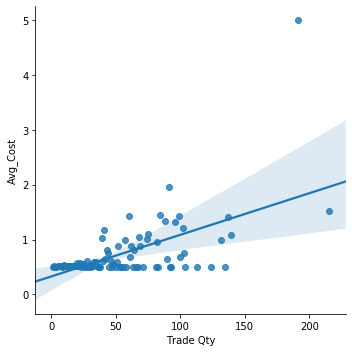

In [0]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=DF_STATS_EUR_COST_NI_2[DF_STATS_EUR_COST_NI_2['Date'] == DF_STATS_EUR_COST_2_DATES[0]]);

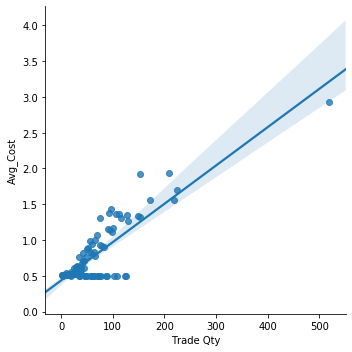

In [0]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=DF_STATS_EUR_COST_NI_2[DF_STATS_EUR_COST_NI_2['Date'] == DF_STATS_EUR_COST_2_DATES[1]]);

In [0]:
from pandas.plotting import scatter_matrix

In [0]:
DF_STATS_EUR_2.columns

Index(['ask12qty', 'ask12tomid', 'ask1qty', 'ask1tomid', 'bid12qty',
       'bid12tomid', 'bid1qty', 'bid1tomid', 'twspr1', 'twspr2', 'chgavg',
       'dt_alt', 'dt_avg', 'dt_cont', 'duration', 'eta1', 'ndfpr', 'rvp',
       'rvxe', 'spot_avg', 'Tick', 'Tick Value'],
      dtype='object')

In [0]:
SUB_DF_STATS_EUR_2 = DF_STATS_EUR_2[['twspr1', 'chgavg', 'dt_avg', 'eta1', 'ndfpr', 'rvp']]

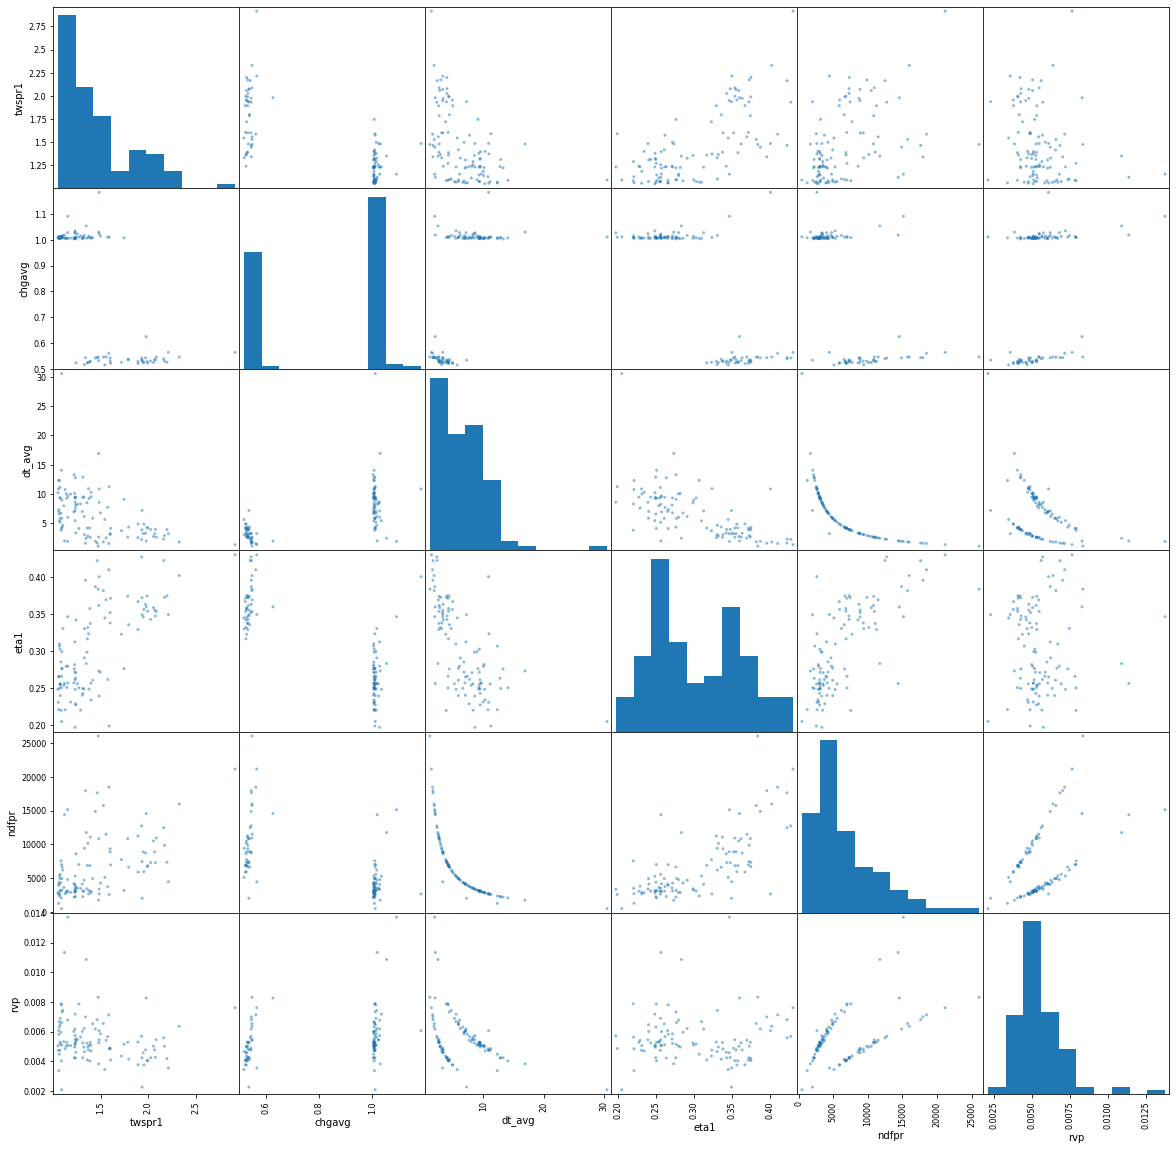

In [0]:
scatter_matrix(SUB_DF_STATS_EUR_2, figsize=(20, 20));